# Описание проекта

Допустим, вы работаете в добывающей компании «N-Нефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

# Согласно заданию должно быть 10 месторождений в каждом регионе, поэтому отберем 10к записей из кадого датасета
data_0 = pd.read_csv('/datasets/geo_data_0.csv').sample(n=10000, random_state=42)
data_1 = pd.read_csv('/datasets/geo_data_1.csv').sample(n=10000, random_state=42)
data_2 = pd.read_csv('/datasets/geo_data_2.csv').sample(n=10000, random_state=42)

## 1.1 Изучение данных по каждому региону

<b>Регион 1</b>

In [2]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 75721 to 74479
Data columns (total 5 columns):
id         10000 non-null object
f0         10000 non-null float64
f1         10000 non-null float64
f2         10000 non-null float64
product    10000 non-null float64
dtypes: float64(4), object(1)
memory usage: 468.8+ KB


In [3]:
data_0.describe()

,f0,f1,f2,product
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.503970,0.248593,2.486682,92.304198
std,0.862336,0.507664,3.260433,44.230401
min,-1.235676,-0.789905,-12.088328,0.080546
25%,-0.056275,-0.212088,0.295841,56.061524
50%,0.506836,0.247616,2.520075,91.267378
75%,1.069148,0.709737,4.719715,128.260047
max,2.281307,1.334828,15.014250,185.299685


In [4]:
data_0.head()

,id,f0,f1,f2,product
75721,7C6bA,0.599283,-0.557623,2.121187,122.073350
80184,dVxsn,0.739017,-0.463156,-1.347584,48.738540
19864,1Gm3l,1.422743,-0.534917,3.718798,131.338088
76699,Nzg1t,1.580244,-0.238458,2.805149,88.327757
92991,Z7b4F,0.918974,0.023961,2.598575,36.959266


<hr>

<b>Регион 2</b>

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 75721 to 74479
Data columns (total 5 columns):
id         10000 non-null object
f0         10000 non-null float64
f1         10000 non-null float64
f2         10000 non-null float64
product    10000 non-null float64
dtypes: float64(4), object(1)
memory usage: 468.8+ KB


In [6]:
data_1.describe()

,f0,f1,f2,product
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.124447,-4.838913,2.473713,68.277669
std,8.984037,5.137173,1.701821,45.887600
min,-23.865679,-24.712672,-0.015885,0.000000
25%,-6.270647,-8.410749,0.999987,30.132364
50%,0.944188,-4.833993,2.008695,57.085625
75%,8.686958,-1.364020,3.999791,107.813044
max,24.476687,12.628332,5.015957,137.945408


In [7]:
data_1.head()

,id,f0,f1,f2,product
75721,fYVDK,6.078076,0.084568,0.002957,0.000000
80184,3SQcq,16.462386,2.712946,1.993030,53.906522
19864,hQ1gJ,7.051898,0.766983,4.990194,134.766305
76699,Y4vux,-0.240045,-0.380804,3.999693,107.813044
92991,H1NUw,13.350111,-8.558281,0.002010,0.000000


<hr>

<b>Регион 3</b>

In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 75721 to 74479
Data columns (total 5 columns):
id         10000 non-null object
f0         10000 non-null float64
f1         10000 non-null float64
f2         10000 non-null float64
product    10000 non-null float64
dtypes: float64(4), object(1)
memory usage: 468.8+ KB


In [9]:
data_2.describe()

,f0,f1,f2,product
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.005133,0.013860,2.507990,95.436813
std,1.720692,1.715481,3.476988,44.368831
min,-6.115718,-5.799367,-10.053130,0.033396
25%,-1.167237,-1.146172,0.188427,60.546696
50%,0.014881,0.006043,2.493505,95.800395
75%,1.151767,1.152784,4.890112,130.359320
max,7.215527,7.761857,14.748519,189.874276


In [10]:
data_2.head()

,id,f0,f1,f2,product
75721,sPjbT,2.111118,-1.679773,3.112240,117.441301
80184,1u4uo,0.734759,0.747788,3.670879,47.841249
19864,kZ6HO,-2.513109,0.844631,-4.922889,45.883483
76699,gCZGK,-2.035301,-1.522988,5.072839,139.014608
92991,rqJHx,2.744145,1.429952,-1.372661,84.004276


## 1 Вывод
Пропусков в данных нет, столбец **id** можно исключить из признаков для обучения, **product** является целевым признаком

# 2. Обучение и проверка модели

<b>Регион 1</b>

In [11]:
features = data_0.drop(axis=1, columns=['product', 'id'])
target = data_0['product']
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(features, target, test_size=0.25, random_state=42)

model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
valid_predict_0 = model_0.predict(X_test_0)
print('RMSE:', sqrt(mean_squared_error(y_test_0, valid_predict_0)))
print('Средний запас сырья: ', valid_predict_0.mean())

RMSE: 37.75159132228586
Средний запас сырья:  92.16832638166959


Сохраним датасет

In [12]:
res_0 = pd.Series(model_0.predict(X_test_0))

<hr>

<b>Регион 2</b>

In [13]:
features = data_1.drop(axis=1, columns=['product', 'id'])
target = data_1['product']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features, target, test_size=0.25, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
valid_predict_1 = model_1.predict(X_test_1)
print('RMSE:', sqrt(mean_squared_error(y_test_1, valid_predict_1)))
print('Средний запас сырья: ', valid_predict_1.mean())

RMSE: 0.9000456023879575
Средний запас сырья:  68.10539275997549


In [14]:
res_1 = pd.Series(model_1.predict(X_test_1))

<hr>

<b>Регион 3</b>

In [15]:
features = data_2.drop(axis=1, columns=['product', 'id'])
target = data_2['product']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features, target, test_size=0.25, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
valid_predict_2 = model_2.predict(X_test_2)
print('RMSE:', sqrt(mean_squared_error(y_test_2, valid_predict_2)))
print('Средний запас сырья: ', valid_predict_2.mean())

RMSE: 40.0745094664861
Средний запас сырья:  95.37375144176313


In [16]:
res_2 = pd.Series(model_2.predict(X_test_2))

# 3. Подготовка к расчёту прибыли

Сохраним все данные для расчетов

In [17]:
num_of_points = 500 # доступно точек для исследования
total_budget = 10*10**9 # общий бюджет
cost_one_point = 50*10**6 # стоимость бурения одной скважины
sale_barrel = 4500 # продажа руб за 1 баррель

Считаем минимальный средний объём сырья в месторождениях региона

In [18]:
used_points = int(total_budget / cost_one_point) # доступно точек для бурения
value_per_deposit = math.ceil(cost_one_point / sale_barrel / 1000) # минимальные объем для окупаемости за 1 точку
value_per_region = value_per_deposit * used_points # минимальные объем для окупаемости за регион
print('Доступно точек для разработки, шт:', used_points)
print('Минимальный объем продукта из точки для окупаемости, тыс.баррелей:', value_per_deposit)
print('Минимальный объем продукта в регионе, тыс.баррелей:', value_per_region)

Доступно точек для разработки, шт: 200
Минимальный объем продукта из точки для окупаемости, тыс.баррелей: 12
Минимальный объем продукта в регионе, тыс.баррелей: 2400


<hr>

Функция для расчёта прибыли

In [19]:
def sum_profit(df):
    """
    Сортируем датасет по убыванию, выбираем первые 200 (used_points) точек.
    Получаем объем сырья и вычитаем минимальный необходимый.
    Умножаем на цену за баррель и на 1000, т.к. размерность в тыс.баррелей
    Получаем прибыль в рублях.
    Округляем
    """
    return math.ceil(df.sort_values(ascending=False)[:used_points].sum() * 1000 * sale_barrel - used_points * cost_one_point)

<hr>

# 4. Расчёт прибыли и рисков 

Функция получения распределения прибыли

In [67]:
state = np.random.RandomState(42)
def get_dist(df):
    """
    Из валидационной выборки берем 500 (num_of_points) случайных точек.
    Считаем прибыль функцией sum_profit
    Сохраняем в список, а затем возвращаем его
    """
    vals = []
    for i in range(1000):
        df_i = df.sample(n=num_of_points, random_state=state)
        vals.append(sum_profit(df_i))
    return pd.Series(vals)


<hr>

<b>Регион 1</b> <br>
Распределение сумм

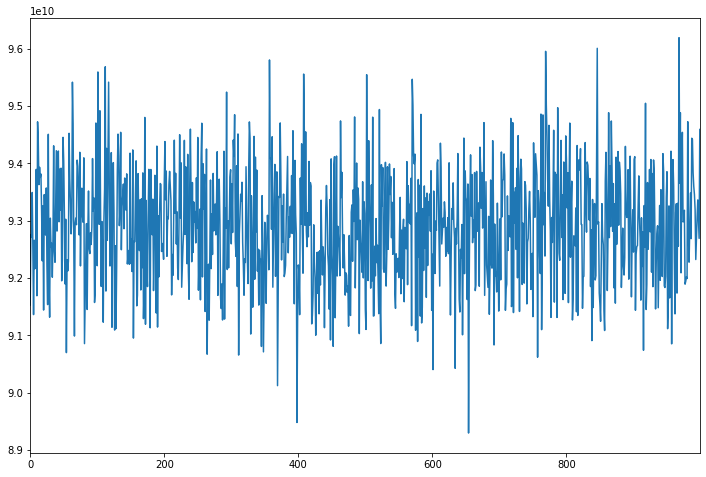

In [68]:
profit_0 = get_dist(res_0)
profit_0.plot(kind='line', figsize=(12, 8))

<hr>

<b>Регион 2</b>

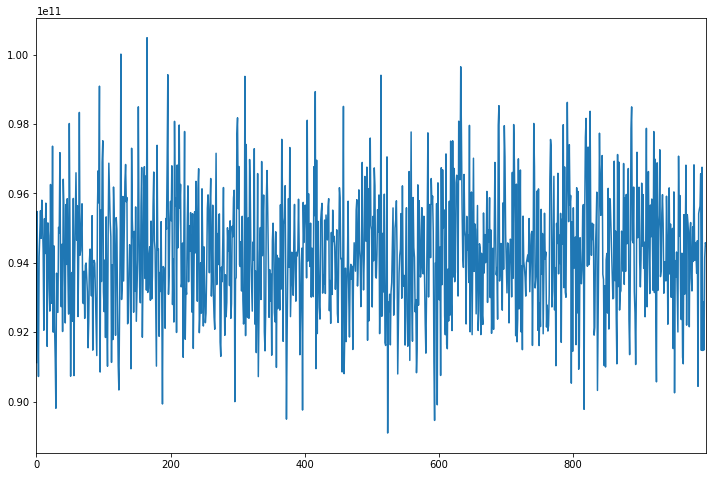

In [69]:
profit_1 = get_dist(res_1)
profit_1.plot(kind='line', figsize=(12, 8))

<hr>

<b>Регион 3</b>

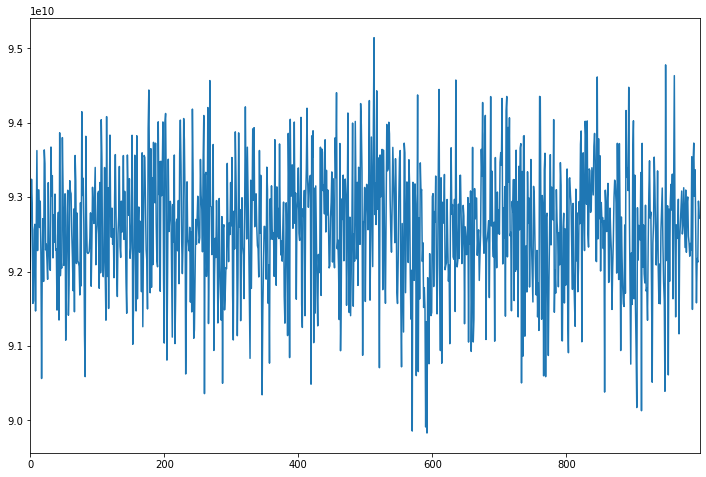

In [70]:
profit_2 = get_dist(res_2)
profit_2.plot(kind='line', figsize=(12, 8))

## 4.2 Cредняя прибыль, 95%-й доверительный интервал и риск убытков.

In [71]:
print('Средняя прибыль, регион 1:', math.ceil(profit_0.mean()))
print('Средняя прибыль, регион 2:', math.ceil(profit_1.mean()))
print('Средняя прибыль, регион 3:', math.ceil(profit_2.mean()))

Средняя прибыль, регион 1: 92899013044
Средняя прибыль, регион 2: 94250938066
Средняя прибыль, регион 3: 92576102072


<b>95%-й доверительный интервал</b>

In [72]:
confidence_interval_0 = st.t.interval(0.95, len(profit_0) - 1, profit_0.mean(), profit_0.sem())
confidence_interval_1 = st.t.interval(0.95, len(profit_1) - 1, profit_1.mean(), profit_1.sem())
confidence_interval_2 = st.t.interval(0.95, len(profit_2) - 1, profit_2.mean(), profit_2.sem())
print("95%-ый доверительный интервал, регион 1:", confidence_interval_0)
print("95%-ый доверительный интервал, регион 2:", confidence_interval_1)
print("95%-ый доверительный интервал, регион 3:", confidence_interval_2)

95%-ый доверительный интервал, регион 1: (92835853920.62473, 92962172166.48526)
95%-ый доверительный интервал, регион 2: (94138376272.57863, 94363499857.97536)
95%-ый доверительный интервал, регион 3: (92523051643.44958, 92629152498.62842)


<b>Риск убытков.</b>

In [73]:
count_losses_0 = 0
count_losses_1 = 0
count_losses_2 = 0
for i in range(1000):
    if total_budget > profit_0[i]:
        count_losses_0 += 1
    if total_budget > profit_1[i]:
        count_losses_1 += 1
    if total_budget > profit_2[i]:
        count_losses_2 += 1
print('Вероятность потерпеть убытки, регион 1:', count_losses_0/1000 * 100)
print('Вероятность потерпеть убытки, регион 2:', count_losses_1/1000 * 100)
print('Вероятность потерпеть убытки, регион 3:', count_losses_2/1000 * 100)

Вероятность потерпеть убытки, регион 1: 0.0
Вероятность потерпеть убытки, регион 2: 0.0
Вероятность потерпеть убытки, регион 3: 0.0


## 4.3 Вывод

Согласно рассчетам во всех регионах отсутствует риск убытков. Выбираем второй регион, так как у него возможна самая больгая прибыль